<a href="https://colab.research.google.com/github/suinkangme/A1_COMP472/blob/main/A1_COMP472.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A1 - COMP 472

Hyun Soo Kim 40174913

Suin Kang 40129337

In [1]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import warnings
from sklearn.neural_network import MLPClassifier

### Import the MyDrive library from CoLab

In [2]:
from google.colab import drive
drive.mount('/content/drive')

# the directory owns this notebook and dataset
import os
os.chdir('/content/drive/MyDrive/comp472/')

Mounted at /content/drive


Definition of train-test-repetition function

In [3]:
def train_test_repetition(layer_size, activation_function, solver, X, y, outputFile, target_names):
  accuracy = []
  macro_avg = []
  weighted_avg = []

  #repeat 5 times
  for i in range (0,5):

    #data is shuffled every time
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

    #initialize new model with same hyperparameters
    model = MLPClassifier(hidden_layer_sizes = layer_size, activation = activation_function, solver = solver)

    #train and predict
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #for average accuracy / macro-average f1 score / weighted-average f1 score and variance calculation
    output = classification_report(y_test, y_pred, target_names = target_names, output_dict = True)
    accuracy.append(output['accuracy'])
    macro_avg.append(output['macro avg']['f1-score'])
    weighted_avg.append(output['weighted avg']['f1-score'])

    #print to text file. This would make it easier to validate the result of each model
    print(f'=== Iteration {i+1} === ', file = outputFile)
    print(classification_report(y_test, y_pred, target_names = target_names), file =outputFile)
    confusion_matrix_result = confusion_matrix(y_test, y_pred)
    print(confusion_matrix_result, file = outputFile)

  #append the calculation in the report
  print('\nThe result after 5 times of train-test repetition:' ,file = outputFile)
  print(f'\tThe average accuracy / variance: {np.mean(accuracy): 6.2f}, {np.var(accuracy): 6.3f}', file = outputFile)
  print(f'\tThe average macro-average f1 score / variance: {np.mean(macro_avg): 6.2f}, {np.var(macro_avg): 6.3f}', file = outputFile)
  print(f'\tThe average weighted-average f1 score / variance: {np.mean(weighted_avg): 6.2f}, {np.var(weighted_avg): 6.3f}', file = outputFile)
  outputFile.flush()

In [4]:
outputFile = open ('penguin-classes.txt', 'w')
warnings.filterwarnings('ignore')

## Dataset - 'penguins.csv'
- Goal : prediction of species
(Adelie, Gentoo, Chinstap)

In [5]:
data_penguins = pd.read_csv('penguins.csv')
data_penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,MALE
1,Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
3,Adelie,Torgersen,36.7,19.3,193,3450,FEMALE
4,Adelie,Torgersen,39.3,20.6,190,3650,MALE


#### Data Preprocessing
- data encoding for categorical values: 'island', 'sex' column

In [6]:
from sklearn.preprocessing import OneHotEncoder

island = np.array(data_penguins['island']).reshape(-1, 1)
island_label = OneHotEncoder().fit_transform(island)
data_penguins['island'] = island_label.toarray()

df = pd.DataFrame({'island':['Torgersen','Biscoe','Dream']})
pd.get_dummies(df)

,island_Biscoe,island_Dream,island_Torgersen
0,0,0,1
1,1,0,0
2,0,1,0


In [7]:
from sklearn.preprocessing import LabelEncoder

data_penguins['sex'] = LabelEncoder().fit_transform(data_penguins['sex'])

#### Plot the percentage of the instances

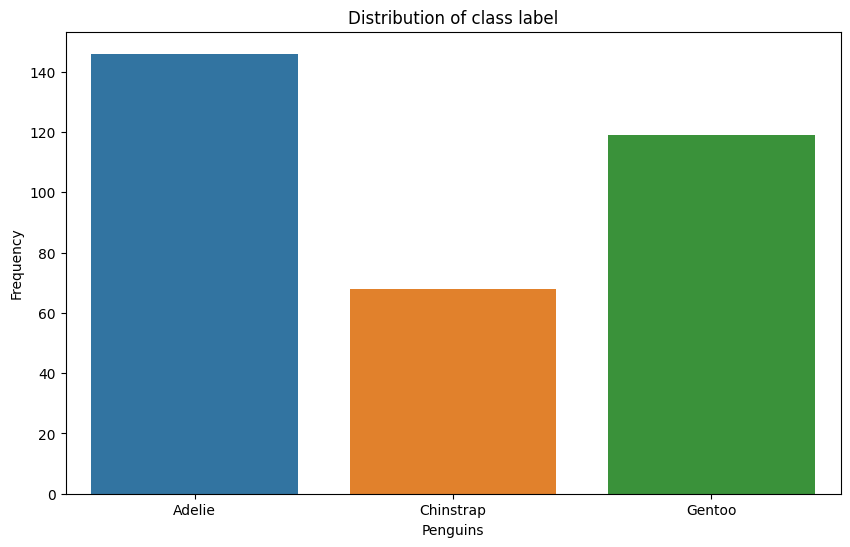

In [8]:
# Check the output class is balanced
penguins_labels = data_penguins['species']

plt.figure(figsize=(10, 6))
sns.countplot(x=penguins_labels)
plt.title('Distribution of class label')
plt.xlabel('Penguins')
plt.ylabel('Frequency')

# save as graphic
plt.savefig('penguin-classes.png')

#### Dataset split into training & test set

In [9]:
# perform feature scaling
from sklearn.preprocessing import StandardScaler
scaled_features_penguins = StandardScaler().fit_transform(data_penguins.iloc[:, 1:].values)
X = scaled_features_penguins
y = data_penguins.iloc[:,0].values

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### Train and test 4 different classifiers

##### Classifier 1 - Base-DT

In [11]:
from sklearn.tree import DecisionTreeClassifier

# Base Decision Tree
classifier_1 = DecisionTreeClassifier()
classifier_1.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
penguins_class = data_penguins.columns[0]
penguins_features = list(data_penguins.columns[1:])

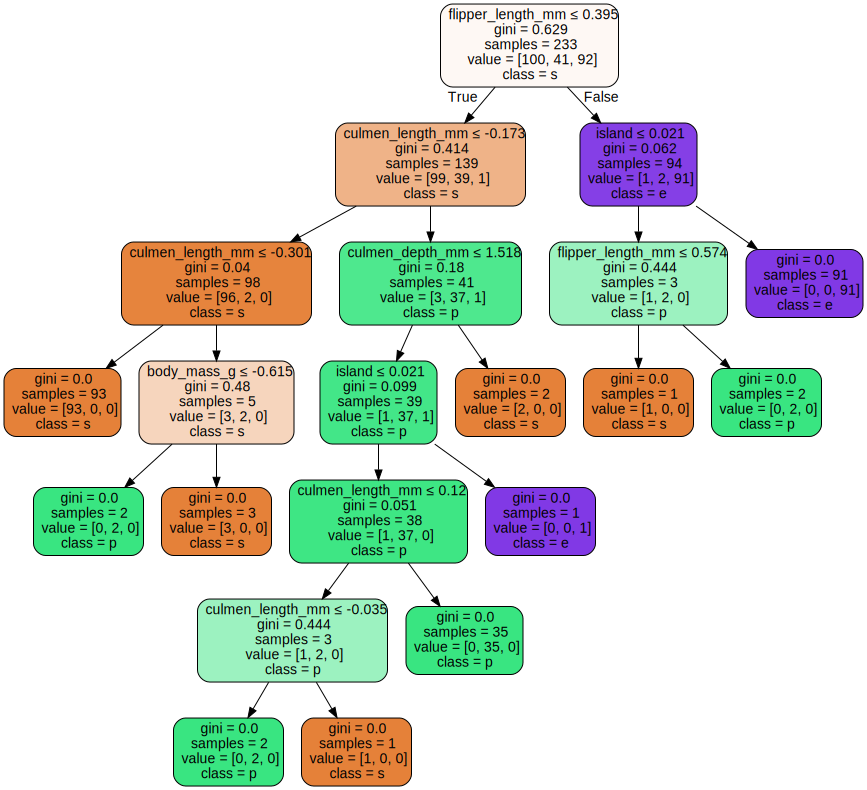

In [13]:
from sklearn import tree
import graphviz

dot_data = tree.export_graphviz(classifier_1,
                feature_names=penguins_features,
                class_names=penguins_class,
                filled=True, rounded=True,
                special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [14]:
# print to the output file
print('**************************************************************', file = outputFile)
print('(c) Classifier 1 - Base DT', file = outputFile)
print(classifier_1, file = outputFile)
print('\n', file = outputFile)

In [16]:
# print classification report
y_pred = classifier_1.predict(X_test)
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=['Adelie', 'Chinstrap', 'Gentoo']))

              precision    recall  f1-score   support

      Adelie       0.91      0.89      0.90        46
   Chinstrap       0.85      0.85      0.85        27
      Gentoo       0.96      1.00      0.98        27

    accuracy                           0.91       100
   macro avg       0.91      0.91      0.91       100
weighted avg       0.91      0.91      0.91       100



In [ ]:
# repeat train-test-print 5 times for classifier 1 here

##### Classifier 2 - Top-DT

In [ ]:
# Top Decision Tree
classifier_2 = DecisionTreeClassifier()
classifier_2.fit(X_train, y_train)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
# repeat train-test-print 5 times for classifer 2 here

Classifier 3 - Base-MLP

In [ ]:
#Train Classifier 3
mlp_base_penguin = MLPClassifier(hidden_layer_sizes =(100, 100,), activation = 'logistic', solver = 'sgd')
mlp_base_penguin.fit(X_train, y_train)

#print to the output file
print('**************************************************************', file = outputFile)
print('(c) Classifier 3 - Base MLP', file = outputFile)
print(mlp_base_penguin, file = outputFile)
print('\n', file = outputFile)

Metrics for Classifier 3

In [ ]:
#predict with Base MLP
y_pred_base_mlp = mlp_base_penguin.predict(X_test)

#print the result here on notebook
print(classification_report(y_test, y_pred_base_mlp, target_names = ['Adelie', 'Gentoo', 'Chinstap']))
print(confusion_matrix(y_test, y_pred_base_mlp))

#print the result to the output file
print(classification_report(y_test, y_pred_base_mlp, target_names = ['Adelie', 'Gentoo', 'Chinstap']), file = outputFile)
confusion_matrix_result =np.array2string(confusion_matrix(y_test, y_pred_base_mlp))
print(confusion_matrix_result, file = outputFile)
outputFile.flush()

              precision    recall  f1-score   support

      Adelie       0.33      1.00      0.50        33
      Gentoo       0.00      0.00      0.00        22
    Chinstap       0.00      0.00      0.00        45

    accuracy                           0.33       100
   macro avg       0.11      0.33      0.17       100
weighted avg       0.11      0.33      0.16       100

[[33  0  0]
 [22  0  0]
 [45  0  0]]


In [ ]:
#repeat train-test 5 times
train_test_repetition((100, 100,), 'logistic', 'sgd', X, y, outputFile, ['Adelie', 'Gentoo', 'Chinstap'])

Classifier 4 - Top-MLP

In [ ]:
#create grid for each hyperparamter we want to test
activation_grid = np.array(['logistic', 'tanh', 'relu'])
neurons_tuple_grid = np.array([(30, 50,), (10, 10, 10,)], dtype = 'object')
solver_grid = np.array(['adam', 'sgd'])

#create parameter grid for GridSearchCV
param_grid = {'hidden_layer_sizes': neurons_tuple_grid, 'activation': activation_grid, 'solver': solver_grid}

#create grid cv object and do the search
mlp_top_penguin = MLPClassifier()
gridcv = sk.model_selection.GridSearchCV(mlp_top_penguin, param_grid = param_grid)
gridcv.fit(X_train, y_train)

#print the result here on notebook
print(f'best parameters: {gridcv.best_params_}')

#print the result to the output file
print('**************************************************************', file = outputFile)
print('(d) Classifier 4 - Top MLP', file = outputFile)
print(f'best parameters: {gridcv.best_params_}\n', file = outputFile)
outputFile.flush()

best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


Metrics for Classifier 4 - Top MLP

In [ ]:
#predict
y_pred_top_mlp = gridcv.best_estimator_.predict(X_test)

#print the result here on notebook
print(classification_report(y_test, y_pred_top_mlp, target_names = ['Adelie', 'Gentoo', 'Chinstap']))
print(confusion_matrix(y_test, y_pred_top_mlp))

#print the result to the output file
print(classification_report(y_test, y_pred_top_mlp, target_names = ['Adelie', 'Gentoo', 'Chinstap']), file = outputFile)
confusion_matrix_result =np.array2string(confusion_matrix(y_test, y_pred_top_mlp))
print(confusion_matrix_result, file = outputFile)
outputFile.flush()

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.99        33
      Gentoo       1.00      0.95      0.98        22
    Chinstap       1.00      1.00      1.00        45

    accuracy                           0.99       100
   macro avg       0.99      0.98      0.99       100
weighted avg       0.99      0.99      0.99       100

[[33  0  0]
 [ 1 21  0]
 [ 0  0 45]]


In [ ]:
train_test_repetition(gridcv.best_params_['hidden_layer_sizes'], gridcv.best_params_['activation'], gridcv.best_params_['solver'], X, y, outputFile,['Adelie', 'Gentoo', 'Chinstap'])

In [ ]:
outputFile.close()

## Dataset - 'abalone.csv'
- Goal : prediction of sex

In [22]:
outputFile = open('abalone-performance.txt', 'w')

In [23]:
data_abalone = pd.read_csv('abalone.csv')
data_abalone.head()

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,F,0.605,0.470,0.165,1.1775,0.6110,0.2275,0.2920,9
1,M,0.550,0.425,0.150,0.8315,0.4110,0.1765,0.2165,10
2,M,0.460,0.345,0.110,0.4595,0.2350,0.0885,0.1160,7
3,F,0.650,0.475,0.165,1.3875,0.5800,0.3485,0.3095,9
4,M,0.575,0.470,0.140,0.8375,0.3485,0.1735,0.2400,11


#### Plot the percentage of the instances

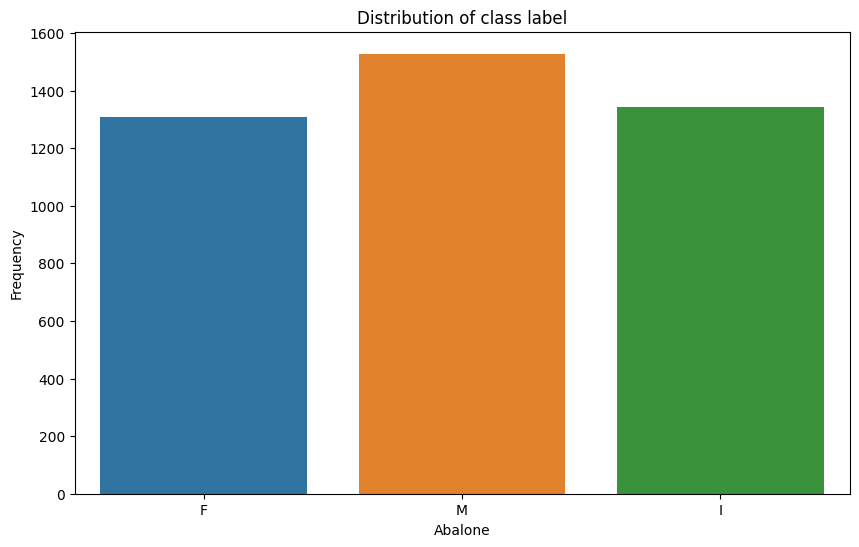

In [24]:
# Check the output class is balanced
abalone_labels = data_abalone['Type']

plt.figure(figsize=(10, 6))
sns.countplot(x=abalone_labels)
plt.title('Distribution of class label')
plt.xlabel('Abalone')
plt.ylabel('Frequency')

# save as graphic
plt.savefig('abalone-classes.png')


#### Dataset split into training & test set

In [25]:
# perform feature scaling
from sklearn.preprocessing import StandardScaler
scaled_features_abalone = StandardScaler().fit_transform(data_abalone.iloc[:, 1:].values)

X = scaled_features_abalone
y = data_abalone.iloc[:,0].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

#### Train and test 4 different classifiers

##### Classifier 1 - Base-DT

In [27]:
from sklearn.tree import DecisionTreeClassifier

# Base Decision Tree
classifier_1 = DecisionTreeClassifier(max_depth=3)
classifier_1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [28]:
abalone_class = data_abalone.columns[0]
abalone_features = list(data_abalone.columns[1:])

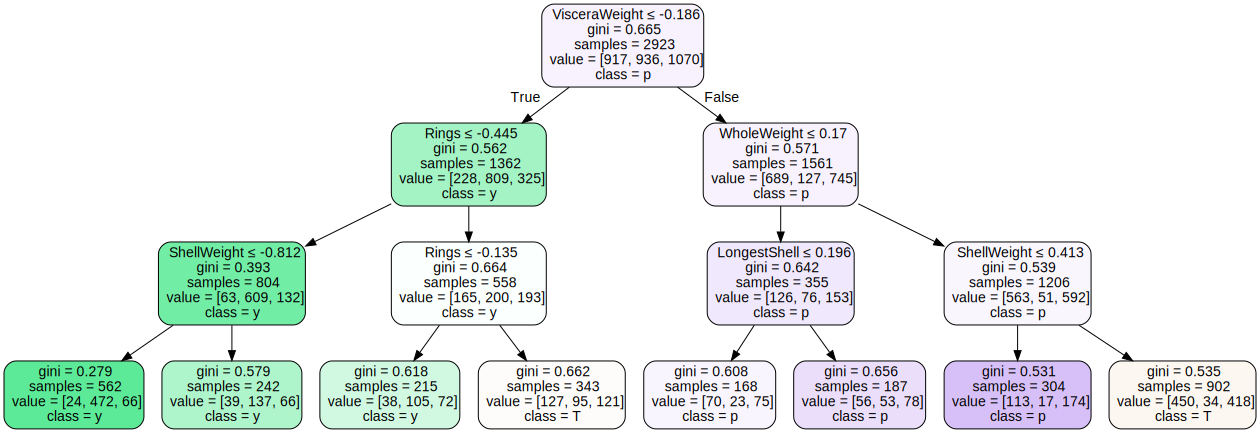

In [29]:
dot_data = tree.export_graphviz(classifier_1,
                feature_names=abalone_features,
                class_names=abalone_class,
                filled=True, rounded=True,
                special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [30]:
# print to the output file
print('**************************************************************', file = outputFile)
print('(c) Classifier 1 - Base DT', file = outputFile)
print(classifier_1, file = outputFile)
print('\n', file = outputFile)

In [31]:
# print classification report
y_pred = classifier_1.predict(X_test)
confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred, target_names=['F', 'M', 'I']))

              precision    recall  f1-score   support

           F       0.43      0.60      0.50       390
           M       0.72      0.79      0.75       406
           I       0.43      0.25      0.31       458

    accuracy                           0.53      1254
   macro avg       0.52      0.54      0.52      1254
weighted avg       0.52      0.53      0.51      1254



##### Classifier 2 - Top-DT

Classifier 3 - Base-MLP

In [ ]:
#Train Classifier 3
mlp_base_abalone = MLPClassifier(hidden_layer_sizes =(100, 100,), activation = 'logistic', solver = 'sgd')
mlp_base_abalone.fit(X_train, y_train)

#print to the output file
print('**************************************************************', file = outputFile)
print('(c) Classifier 3 - Base MLP', file = outputFile)
print(mlp_base_abalone, file = outputFile)
print('\n', file = outputFile)

Metrics for Classifier 3

In [ ]:
#predict with Base MLP
y_pred_base_mlp = mlp_base_abalone.predict(X_test)

#print the result here on notebook
print(classification_report(y_test, y_pred_base_mlp, target_names = ['F', 'M', 'I']))
print(confusion_matrix(y_test, y_pred_base_mlp))

#print the result to the output file
print(classification_report(y_test, y_pred_base_mlp, target_names = ['F', 'M', 'I']), file = outputFile)
confusion_matrix_result = np.array2string(confusion_matrix(y_test, y_pred_base_mlp))
print(confusion_matrix_result, file = outputFile)
outputFile.flush()

              precision    recall  f1-score   support

           F       0.44      0.08      0.14       386
           M       0.64      0.77      0.70       415
           I       0.45      0.68      0.54       453

    accuracy                           0.52      1254
   macro avg       0.51      0.51      0.46      1254
weighted avg       0.51      0.52      0.47      1254

[[ 31  72 283]
 [  2 318  95]
 [ 37 107 309]]


In [ ]:
train_test_repetition((100, 100,), 'logistic', 'sgd', X, y, outputFile, ['F', 'M', 'I'])

Classifier 4 - Top-MLP

In [ ]:
#create grid for each hyperparamter we want to test
activation_grid = np.array(['logistic', 'tanh', 'relu'])
neurons_tuple_grid = np.array([(30, 50,), (10, 10, 10,)])
solver_grid = np.array(['adam', 'sgd'])

#create parameter grid for GridSearchCV
param_grid = {'hidden_layer_sizes': neurons_tuple_grid, 'activation': activation_grid, 'solver': solver_grid}

#create grid cv object and search
mlp_top_abalone = MLPClassifier()
gridcv = sk.model_selection.GridSearchCV(mlp_top_abalone, param_grid = param_grid)
gridcv.fit(X_train, y_train)

#print the result here on notebook
print(f'best parameters: {gridcv.best_params_}')

#print the result to the output file
print('**************************************************************', file = outputFile)
print('(d) Classifier 4 - Top MLP', file = outputFile)
print(f'best parameters: {gridcv.best_params_}\n', file = outputFile)
outputFile.flush()

best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


Metrics for Classifier 4

In [ ]:
y_pred_top_mlp = gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_top_mlp, target_names = ['F', 'M', 'I']))
print(confusion_matrix(y_test, y_pred_top_mlp))

print(classification_report(y_test, y_pred_top_mlp, target_names = ['F', 'M', 'I']), file = outputFile)
confusion_matrix_result = np.array2string(confusion_matrix(y_test, y_pred_top_mlp))
print(confusion_matrix_result, file = outputFile)
outputFile.flush()

              precision    recall  f1-score   support

           F       0.48      0.38      0.42       386
           M       0.68      0.81      0.74       415
           I       0.50      0.51      0.51       453

    accuracy                           0.57      1254
   macro avg       0.56      0.57      0.56      1254
weighted avg       0.56      0.57      0.56      1254

[[145  62 179]
 [ 29 338  48]
 [125  98 230]]


In [ ]:
train_test_repetition(gridcv.best_params_['hidden_layer_sizes'], gridcv.best_params_['activation'], gridcv.best_params_['solver'], X, y, outputFile, ['F', 'M', 'I'])

In [ ]:
outputFile.close()